# Pseudo-bayesian method

In [6]:
import numpy as np
from numpy import pi as pi
import matplotlib.pyplot as plt
from src.utilities.utilstf import get_spectrogram
from mcsm_benchmarks.SignalBank import SignalBank
from mcsm_benchmarks.Benchmark import Benchmark
from src.methods.method_pseudo_bayesian import NewMethod
methodml = NewMethod()
funa = methodml.method

In [7]:
# Define signal
SNRin = 20
N = 2**10
sbank = SignalBank(N=N,return_signal=True)
tmin = sbank.tmin
tmax = sbank.tmax

# s = sbank.signal_mc_synthetic_mixture()
# s = sbank.signal_mc_multi_linear_2()
# s = sbank.signal_mc_multi_linear()
s = sbank.signal_mc_synthetic_mixture_2()
# s = sbank.signal_mc_synthetic_mixture_3()

qrf = []
for i in range(10):
    noise = np.random.randn(N,)
    signal = Benchmark.sigmerge(s,noise,SNRin)

    signal_output = funa(signal,[], [], [], 0.4, 0.2)
    qrf.append(Benchmark.snr_comparison(s,signal_output,tmin=tmin,tmax=tmax))

print(np.mean(qrf))

S, F = get_spectrogram(signal)
F = F[0:N+1]

    0.2000

    0.4000

    0.2000

    0.4000

    0.2000

    0.4000

    0.2000

    0.4000

    0.2000

    0.4000

    0.2000

    0.4000

    0.2000

    0.4000

    0.2000

    0.4000

    0.2000

    0.4000

    0.2000

    0.4000

23.427734073441375


In [8]:
# Load the method and apply it with default parameters:

# pb_method(x, Ncomp, use_sst, ds, beta, alpha, div, Pnei, PneiMask, M, L,return_comps, return_instf)


Output SNR = 23.77010980278348 (dB)


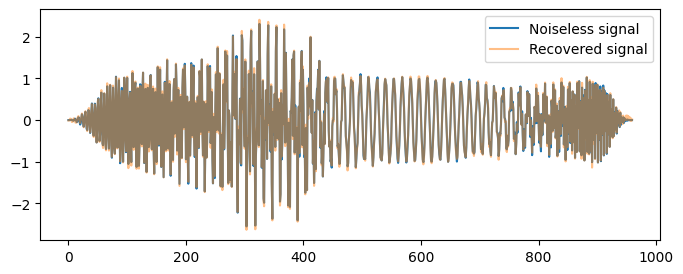

In [9]:
# Compare with the original, noiseless, signal.
print('Output SNR = {} (dB)'.format(Benchmark.snr_comparison(s,signal_output,tmin=tmin,tmax=tmax)))

plt.figure(figsize=(8,3))
plt.plot(s[tmin:tmax],label='Noiseless signal')
plt.plot(signal_output[tmin:tmax],alpha=0.5,label='Recovered signal')
plt.legend()

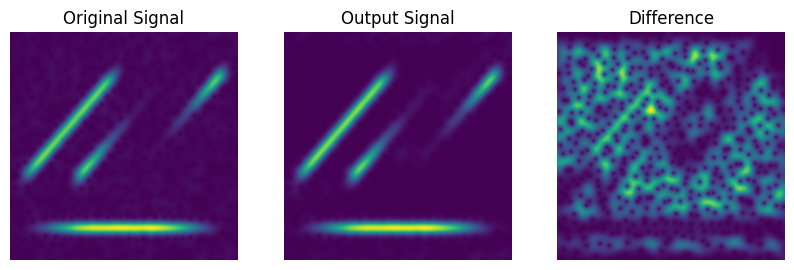

In [10]:
# Spectrograms
S_output, F_output = get_spectrogram(signal_output)
F_output = F_output[0:N+1]

fig, axs = plt.subplots(1,3, figsize = (10,3))
[ax.axis('off') for ax in axs]
axs[0].imshow(abs(F), origin='lower')
axs[0].set_title('Original Signal')
axs[1].imshow(abs(F_output), origin='lower')
axs[1].set_title('Output Signal')
axs[2].imshow(abs(F_output-F), origin='lower')
axs[2].set_title('Difference')
plt.show()

